In [1]:
import numpy as np
import pandas as pd
import linecache
import ctypes

In [2]:
class Newnode :
    def __init__(self):
        self.key = -1 
        self.concept =" "
        self.neigh = []
        self.relation_w_n = []
        self.skills = []
        


In [3]:
def createnode(key,concept,skills,neighbours,relations):
    node = Newnode()
    node.key = key
    node.concept = concept
    node.neigh = neighbours
    node.skills = skills
    node.relation_w_n = relations
    return node

In [4]:
def update(key_node,relatives,relations):
    for i in range(len(relatives)):
        key_node[relatives[i]].neigh.append(node)
        key_node[relatives[i]].relation_w_n.append(-relations[i])

In [5]:
def printnode(n):
    #l = open("output.txt",'r').readlines()
    #node_printing = l[n+1].split()
    print("The concept is ",key_node[n].concept)
    neighbours = []
    for i in range(len(key_node[n].neigh)) :
        neighbours.append(key_node[key_node[n].neigh[i]].concept)
    print("The neighbours are " + str(neighbours))
    relations = []
    for i in range(len(key_node[n].relation_w_n)) :
        relations.append(key_node[n].relation_w_n[i])
    print("The relation with neighnours are " + str(relations))
    print("The skills of this concept is "+ str(key_node[n].skills))

In [6]:
def deletenode(n,key_node,all_relations_for_graph,G):
    G.remove_node(n)
    all_relations_for_graph = G.edges()
    key_node[n]="Deleted"
    lines = open("output.txt",'r').readlines()
    lines[n-1] = str(n) + " Deleted\n" 
    out = open("output.txt",'w')
    out.writelines(lines)
    out.close()
    return key_node, all_relations_for_graph, G

In [7]:
def editnode(n,concept,skills,neighbours,relations,G,H,all_relations_for_graph):
    key_node[n].concept = concept
    key_node[n].skills = skills
    key_node[n].neigh = neighbours
    key_node[n].relations_w_n = relations
    G.remove_node(n)
    H.add_node(n)
    H.add_nodes_from(G.nodes())
    H.add_edges_from(G.edges())
    a = []
    for i in range(len(neighbours)):
        a.append((n,neighbours[i]))
    H.add_edges_from(a)
    del G
    return H,all_relations_for_graph

In [8]:
def bfs_traversal(G,root) :
    edges = nx.bfs_edges(G, root)
    nodes = [root] + [v for u, v in edges]
    return nodes


In [9]:
def get_levels(key_node):
    levels= {}
    levels[1] = 1
    for a in range(2,len(key_node)):
        b = key_node[a].relation_w_n[0]
        c = key_node[a].neigh[0]
        if(b==1):
            levels[a] = levels[c] + 1
        if(b==0):
            levels[a]=levels[c]
    return levels

In [10]:
out_file = open("output.txt",'a+')
concept_data= open("Concepts_data.txt","r")
lines  = concept_data.readlines()
lines=[x.strip() for x in lines]
key_node = {}
all_relations_for_graph = []

In [11]:
for i in range(int(len(lines)/5)) :
    key = int(lines[5*i])
    concept = lines[5*i+1]
    skills = lines[5*i+2].split()
    neigh = lines[5*i+3].split()
    relation = lines[5*i+4].split()
    s = []
    n = []
    r = []
    for j in range(len(skills)) :
        s.append(int(skills[j]))
    if(neigh[0]!="-"):
        for j in range(len(neigh)):
            n.append(int(neigh[j]))
            r.append(int(relation[j]))
            all_relations_for_graph.append((key,int(neigh[j])))
    node = createnode(key,concept,s,n,r)
    key_node[key] = node
    update(key_node,n,r)

In [12]:
def getkeys_asarray(dict):
    return [*dict]
a = getkeys_asarray(key_node)
for i in range(len(a)):
    out_file.write(str(a[i])+" "+str(id(key_node[a[i]]))+"\n")
out_file.close()

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.Graph()

In [14]:
all_relations_for_graph

[(2, 1), (3, 1), (4, 2), (5, 2), (6, 3), (7, 3), (8, 3), (8, 7)]

In [15]:
# adding just one node:
G.add_node(1)
# a list of nodes:
G.add_nodes_from(key_node.keys())

In [16]:
G.add_edges_from(all_relations_for_graph)

C:\Users\adity\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


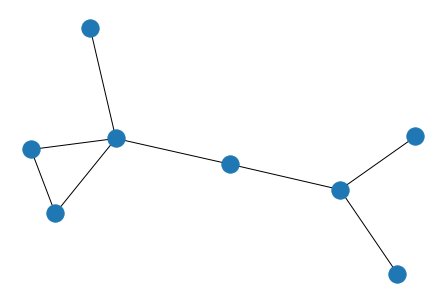

In [17]:
nx.draw(G)

In [18]:
#using printnode
printnode(8)

The concept is  concept 8
The neighbours are ['concept 3', 'concept 7']
The relation with neighnours are [1, 0]
The skills of this concept is [0, 0, 0, 1]


In [19]:
#definig levels
levels= get_levels(key_node)

In [20]:
levels

{1: 1, 2: 2, 3: 2, 4: 2, 5: 3, 6: 3, 7: 3}

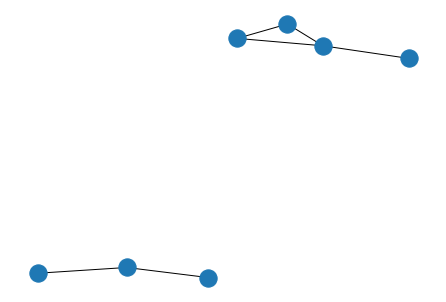

In [21]:
#using deletenode
key_node, all_relations_for_graph, G = deletenode(1,key_node,all_relations_for_graph,G)
nx.draw(G)

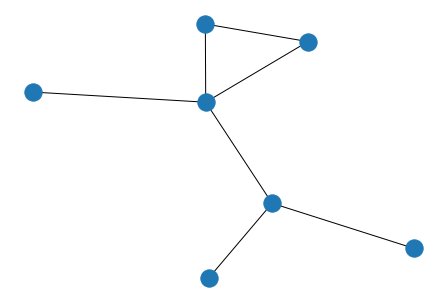

In [22]:
#using editnode
H = nx.Graph()
G, all_relations_for_graph = editnode(2,"Concept 2",[0,0,0,0],[3,4,5],[0,0,-1],G,H,all_relations_for_graph)
nx.draw(G)

In [23]:
#using traversal
nodes = bfs_traversal(G,2)
nodes


[2, 3, 4, 5, 6, 7, 8]